**basic imports and standards**



In [1]:
from pathlib import Path
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score

CHRIS_DATA_PATH = Path("C:/Users/Chris/OneDrive/Desktop/CPSC-483/483-final-project-datasets/")
MAX_DATA_PATH = Path("C:/Users/maxpd/Desktop/483 ML/Intrusion Detection/483-final-project-datasets/")

X_train_path = CHRIS_DATA_PATH / "X_train_preprocessed.csv"
X_test_path = CHRIS_DATA_PATH / "X_test_preprocessed.csv"
y_train_path = CHRIS_DATA_PATH / "y_train.csv"
y_test_path = CHRIS_DATA_PATH / "y_test.csv"

X_train = pd.read_csv(X_train_path)
X_test = pd.read_csv(X_test_path)
y_train = pd.read_csv(y_train_path)
y_test = pd.read_csv(y_test_path)

plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.titlesize'] = 18
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.grid'] = True

rand_state = 42

y_test = y_test['label']
y_train = y_train['label']

**K-nearest neighbors**
1. tune number of neighbors

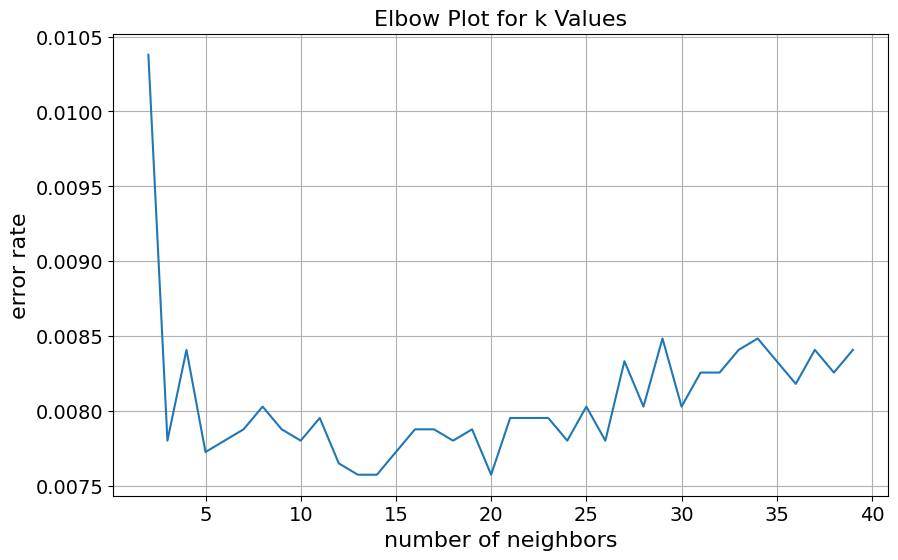

In [2]:
from sklearn.neighbors import KNeighborsClassifier

k_vals = []
error_rates = []

for i in range(2, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    error_rates.append(
        1 - accuracy_score(y_test, knn.predict(X_test))
    )
    k_vals.append(i)

plt.figure()
plt.title("Elbow Plot for k Values", fontsize=16)
plt.plot(k_vals, error_rates, linestyle='-')
plt.xlabel("number of neighbors")
plt.ylabel("error rate")
plt.show()


2. tune weight function

Text(0, 0.5, 'error rate')

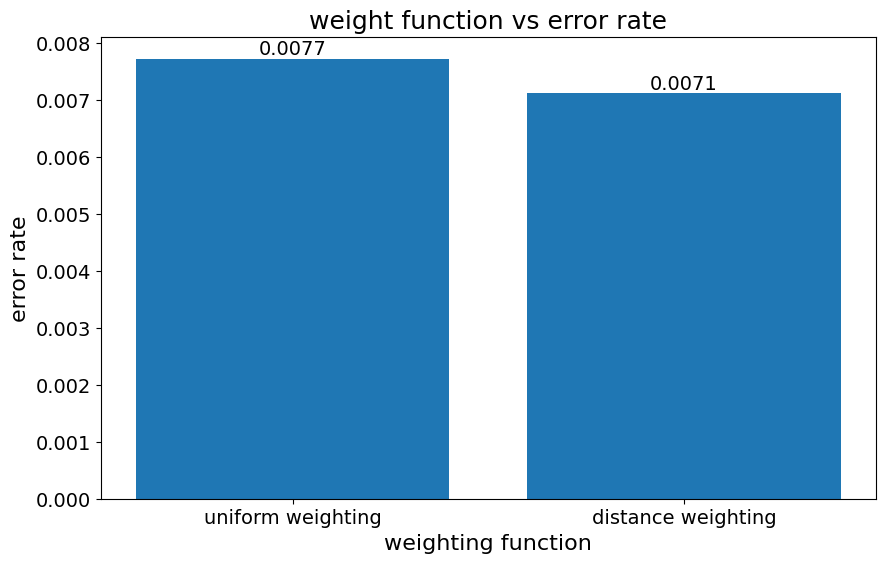

In [41]:
knn_uniform_weights = KNeighborsClassifier(n_neighbors=15, weights='uniform') #uniform is the default
knn_distance_weights = KNeighborsClassifier(n_neighbors=15, weights='distance')

knn_uniform_weights.fit(X_train, y_train)
knn_distance_weights.fit(X_train, y_train)

uniform_error = 1 - accuracy_score(y_test, knn_uniform_weights.predict(X_test))
distance_error = 1 - accuracy_score(y_test, knn_distance_weights.predict(X_test))

plt.figure()
plt.title("weight function vs error rate")
functions = ["uniform weighting", "distance weighting"]
counts = [uniform_error, distance_error]
for i, err in enumerate(counts):
    plt.text(i, err, f"{err:.4f}", ha='center', va='bottom')
plt.bar(functions, counts)
plt.ylim()
plt.grid(False)
plt.xlabel("weighting function")
plt.ylabel("error rate")


3. tune distance metric

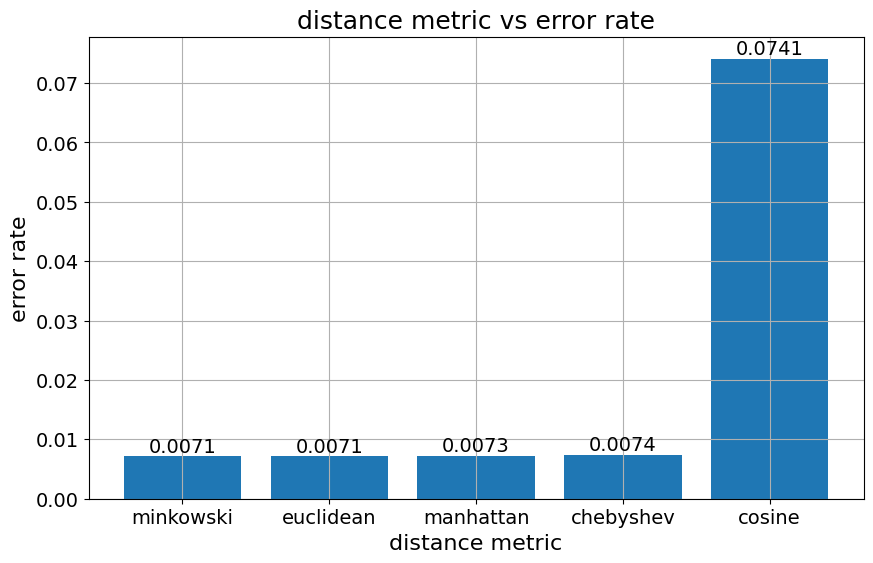

In [ ]:
knn_minkowski = KNeighborsClassifier(n_neighbors=15, weights='distance', metric='minkowski')
knn_euclidean = KNeighborsClassifier(n_neighbors=15, weights='distance', metric='euclidean')
knn_manhattan = KNeighborsClassifier(n_neighbors=15, weights='distance', metric='manhattan')
knn_chebyshev = KNeighborsClassifier(n_neighbors=15, weights='distance', metric='chebyshev')
knn_cosine = KNeighborsClassifier(n_neighbors=15, weights='distance', metric='cosine')

knn_minkowski.fit(X_train, y_train)
knn_euclidean.fit(X_train, y_train)
knn_manhattan.fit(X_train, y_train)
knn_chebyshev.fit(X_train, y_train)
knn_cosine.fit(X_train, y_train)

minkowski_error = 1 -accuracy_score(y_test, knn_minkowski.predict(X_test))
euclidean_error = 1 -accuracy_score(y_test, knn_euclidean.predict(X_test))
manhattan_error = 1 -accuracy_score(y_test, knn_manhattan.predict(X_test))
chebyshev_error =1 - accuracy_score(y_test, knn_chebyshev.predict(X_test))
cosine_error = 1 -accuracy_score(y_test, knn_cosine.predict(X_test))

plt.figure()
plt.title("distance metric vs error rate")
functions = ["minkowski", "euclidean", "manhattan", "chebyshev", "cosine"]
counts = [minkowski_error, euclidean_error, manhattan_error, chebyshev_error, cosine_error]
for i, err in enumerate(counts):
    plt.text(i, err, f"{err:.4f}", ha='center', va='bottom')
plt.bar(functions, counts)
plt.ylim()
plt.xlabel("distance metric")
plt.ylabel("error rate")
plt.show()


4. check for over/underfitting using the learning curve

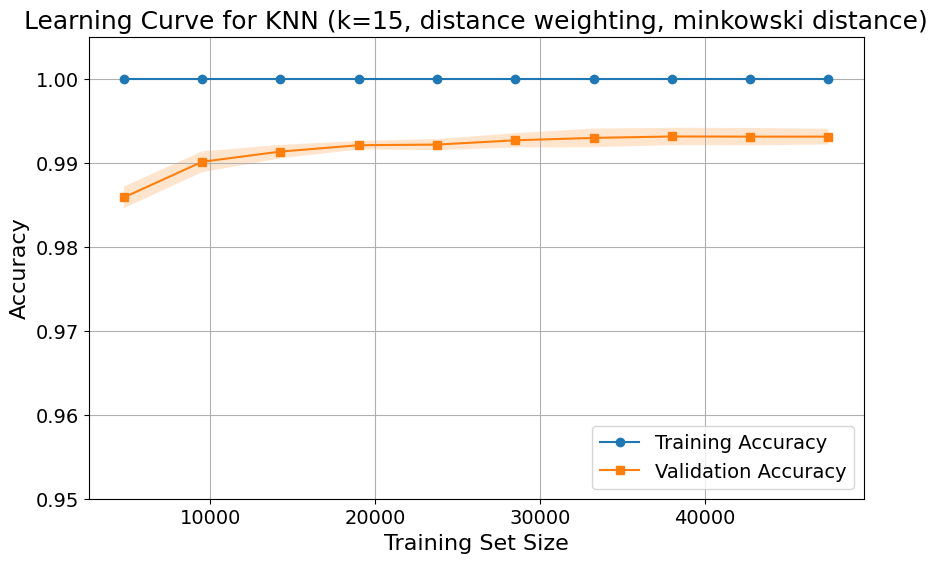

In [8]:
knn = KNeighborsClassifier(n_neighbors=15, weights='distance', metric='minkowski')

train_sizes, train_scores, validation_scores = learning_curve(
    estimator=knn,
    X=X_train,
    y=y_train,
    cv=10,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1, 10),
    shuffle=True,
    random_state=rand_state
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(validation_scores, axis=1)
val_std = np.std(validation_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, val_mean, label='Validation Accuracy', marker='s')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2)
plt.title("Learning Curve for KNN (k=15, distance weighting, minkowski distance)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.grid(True)
plt.ylim(0.95, 1.005)
plt.show()

for knn the learning curve for training is always flat, and here the learning curve of the validation converges with the training learning curve, and the distance between them is very small. model is not over/underfitting

In [70]:
import os 

filename = 'finalized_model_KNN.pkl'
path = os.path.join(CHRIS_DATA_PATH, filename)

with open(path, 'wb') as f:
    pickle.dump(knn, f)

**Naive Bayes**
1. tune the smoothing variable

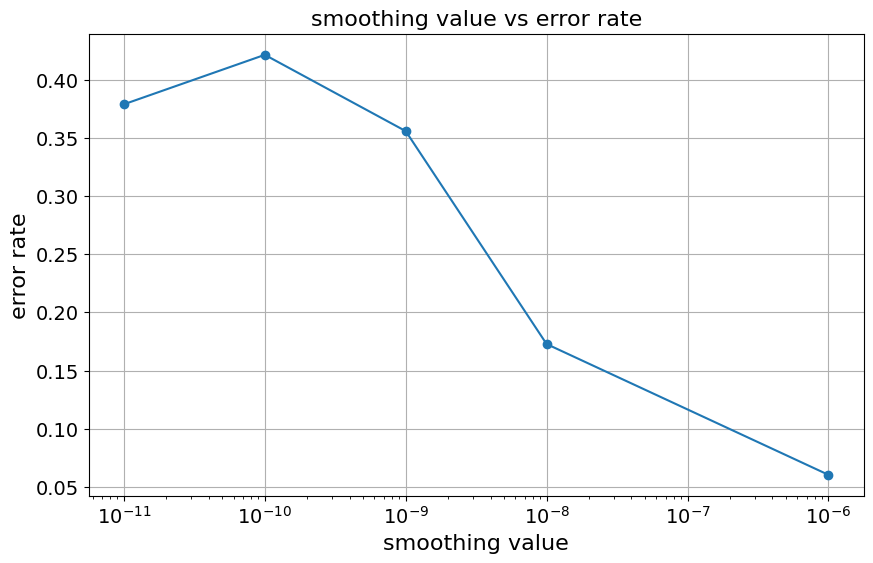

In [12]:
from sklearn.naive_bayes import GaussianNB #using gaussian NB because it allows for a mix of continuous and discrete encoded categorical variables

smooth_vars = [1e-11, 1e-10, 1e-9, 1e-8, 1e-6]
error_rates = []

for i in smooth_vars:
    nb = GaussianNB(var_smoothing=i)
    nb.fit(X_train, y_train)
    error_rates.append(
        1 - accuracy_score(y_test, nb.predict(X_test))
    )

plt.figure()
plt.title("smoothing value vs error rate", fontsize=16)
plt.plot(smooth_vars, error_rates, linestyle='-', marker='o')
plt.xscale('log')
plt.xlabel("smoothing value")
plt.ylabel("error rate")
plt.show()

    

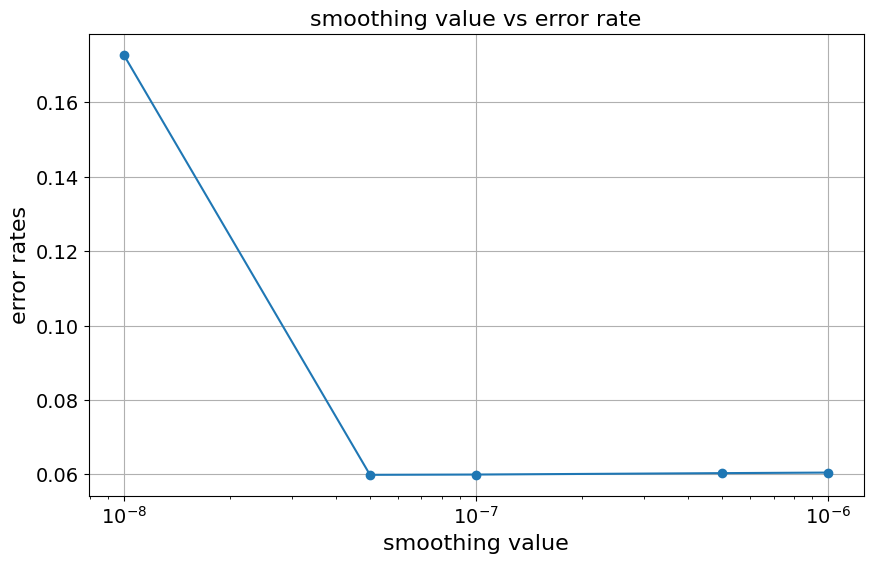

In [11]:
smooth_vars = [1e-8, 5e-8, 1e-7, 5e-7, 1e-6]
error_rates = []

for i in smooth_vars:
    nb = GaussianNB(var_smoothing=i)
    nb.fit(X_train, y_train)
    error_rates.append(
        1 - accuracy_score(y_test, nb.predict(X_test))
    )

plt.figure()
plt.title("smoothing value vs error rate", fontsize=16)
plt.plot(smooth_vars, error_rates, linestyle='-', marker='o')
plt.xscale('log')
plt.xlabel("smoothing value")
plt.ylabel("error rates")
plt.show()

2. learning curve to check for over/underfitting

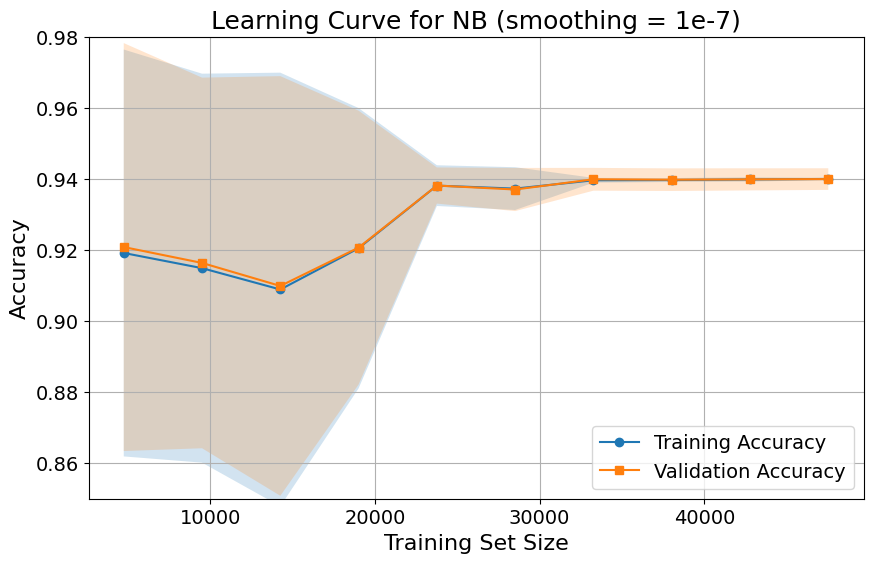

In [13]:
nb = GaussianNB(var_smoothing=1e-7)

train_sizes, train_scores, validation_scores = learning_curve(
    estimator=nb,
    X=X_train,
    y=y_train,
    cv=10,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1, 10),
    shuffle=True,
    random_state=rand_state
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(validation_scores, axis=1)
val_std = np.std(validation_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, val_mean, label='Validation Accuracy', marker='s')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2)
plt.title("Learning Curve for NB (smoothing = 1e-7)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.grid(True)
plt.ylim(0.85, 0.98)
plt.show()


at first, both the training and validation learning curves drop a bit, but as the training set size approaches ~25000, they converge until eventually after 30000 instances, there are no improvements in model accuracy. model is not overfitting or underfitting

In [90]:
filename = 'finalized_model_NaiveBayes.pkl'
path = os.path.join(CHRIS_DATA_PATH, filename)

with open(path, 'wb') as f:
    pickle.dump(knn, f)

**Stochastic Gradient Descent**
1. tune max iterations

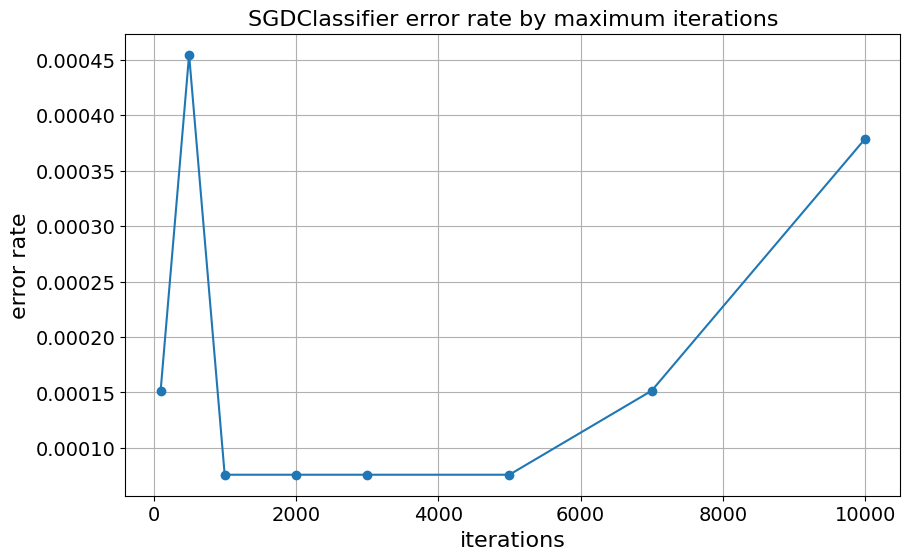

In [16]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

iteration_values = [100, 500, 1000, 2000, 3000, 5000, 7000, 10000]
error_rates = []

for i in iteration_values:
    sd = SGDClassifier(max_iter=i)
    sd.fit(X_train_scaled, y_train)
    error_rates.append(
        1 - accuracy_score(y_test, sd.predict(X_test_scaled))
    )


plt.figure()
plt.title("SGDClassifier error rate by maximum iterations", fontsize=16)
plt.plot(iteration_values, error_rates, linestyle='-', marker='o')
plt.xlabel("iterations")
plt.ylabel("error rate")
plt.ylim()
plt.grid(True)
plt.show()

2. pick best loss function

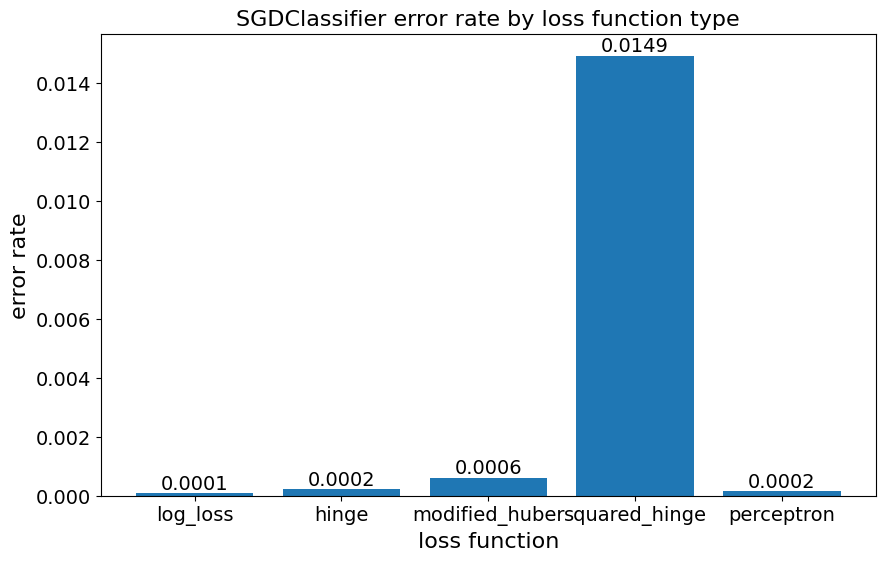

In [26]:
loss_functions = ['log_loss', 'hinge', 'modified_huber', 'squared_hinge', 'perceptron']
error_rates = []

for i in loss_functions:
    sd = SGDClassifier(max_iter=2000, loss=i)
    sd.fit(X_train_scaled, y_train)
    error_rates.append(
        1 - accuracy_score(y_test, sd.predict(X_test_scaled))
    )


plt.figure()
plt.title("SGDClassifier error rate by loss function type", fontsize=16)
for i, err in enumerate(error_rates):
    plt.text(i, err, f"{err:.4f}", ha='center', va='bottom')
plt.bar(loss_functions, error_rates)
plt.xlabel("loss function")
plt.ylabel("error rate")
plt.ylim()
plt.grid(False)
plt.show()

3. tune regularization strength

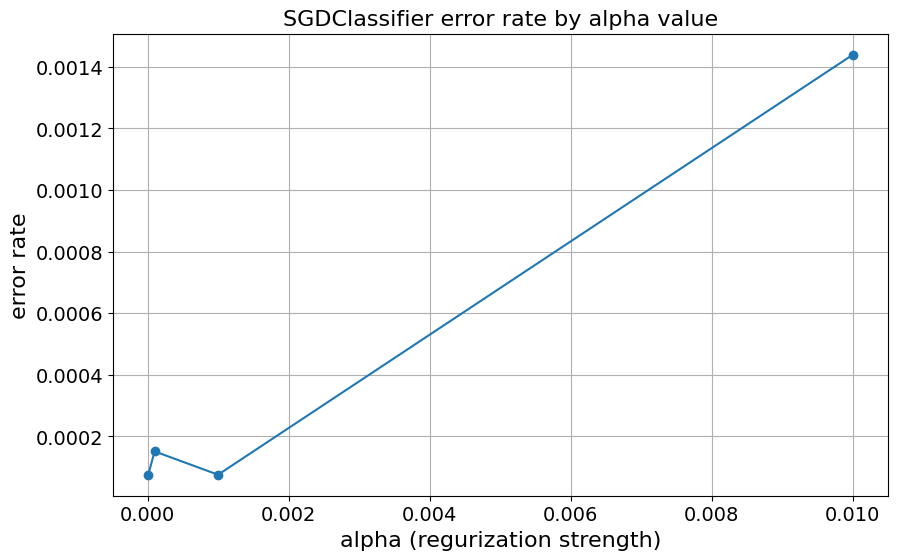

[7.575757575761788e-05, 0.00015151515151512474, 7.575757575761788e-05, 0.0014393939393939625]


In [28]:
reg_parameters = [1e-5, 1e-4, 1e-3, 1e-2]
error_rates = []
for i in reg_parameters:
    sd = SGDClassifier(max_iter=2000, loss='log_loss', alpha=i)
    sd.fit(X_train_scaled, y_train)
    error_rates.append(
        1 - accuracy_score(y_test, sd.predict(X_test_scaled))
    )


plt.figure()
plt.title("SGDClassifier error rate by alpha value", fontsize=16)
plt.plot(reg_parameters, error_rates, linestyle='-', marker='o')
plt.xlabel("alpha (regurization strength)")
plt.ylabel("error rate")
plt.ylim()
plt.grid(True)
plt.show()
print(error_rates)

4. pick best learning rate

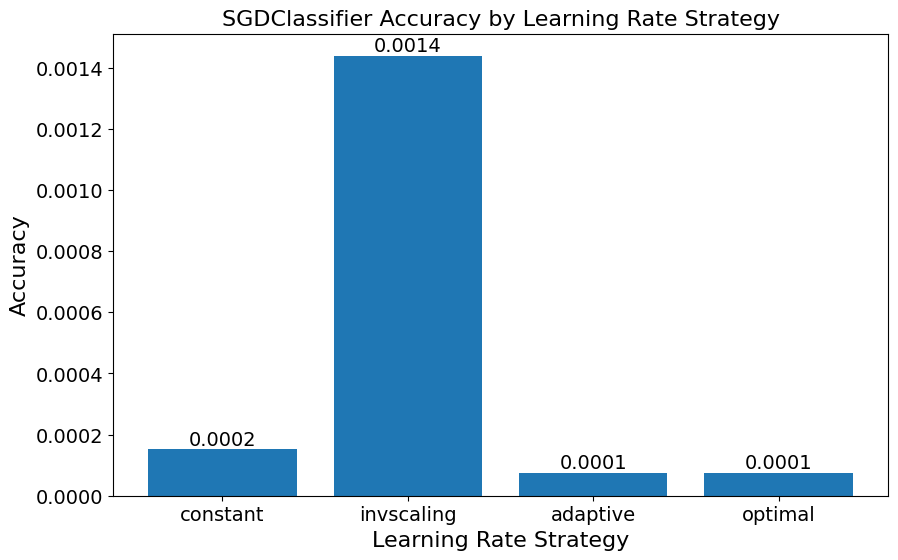

error rates: [0.00015151515151512474, 0.0014393939393939625, 7.575757575761788e-05, 7.575757575761788e-05]


In [31]:
learning_rates = ['constant', 'invscaling', 'adaptive', 'optimal']
error_rates = []

for i in learning_rates:
    sd = SGDClassifier(max_iter=2000, loss='log_loss', learning_rate=i, eta0=0.1)
    sd.fit(X_train_scaled, y_train)
    err = 1 - accuracy_score(y_test, sd.predict(X_test_scaled))
    error_rates.append(err)

plt.figure()
plt.title("SGDClassifier Accuracy by Learning Rate Strategy", fontsize=16)
plt.bar(learning_rates, error_rates)
for i, err in enumerate(error_rates):
    plt.text(i, err, f"{err:.4f}", ha='center', va='bottom')
plt.xlabel("Learning Rate Strategy")
plt.ylabel("Accuracy")
plt.ylim()
plt.grid(False)
plt.show()

print("error rates:", error_rates)

5. learning curve to check for over/underfitting

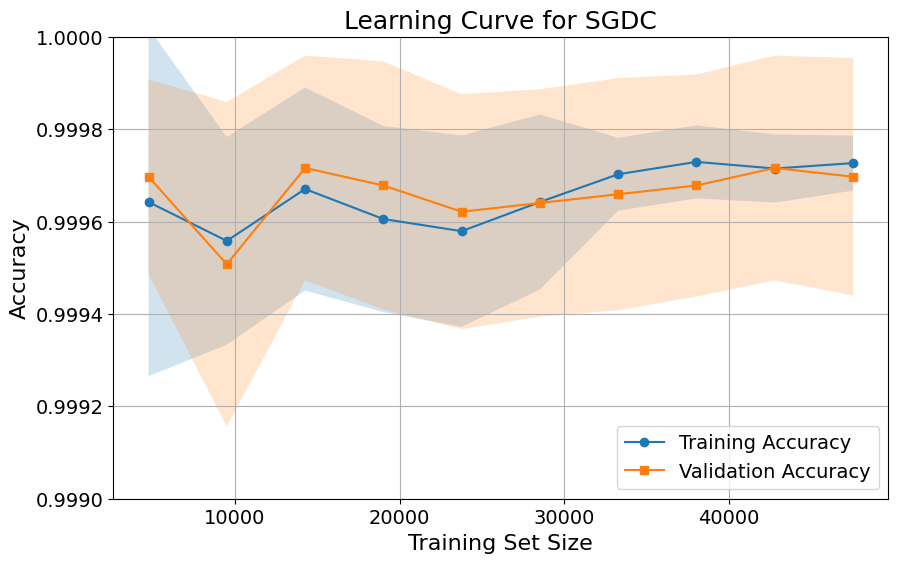

In [35]:
sd = SGDClassifier(loss='log_loss', max_iter=2000, alpha=1e-3, learning_rate='optimal')

train_sizes, train_scores, validation_scores = learning_curve(
    estimator=sd,
    X=X_train_scaled,
    y=y_train,
    cv=10,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1, 10),
    shuffle=True,
    random_state=rand_state
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(validation_scores, axis=1)
val_std = np.std(validation_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, val_mean, label='Validation Accuracy', marker='s')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2)
plt.title("Learning Curve for SGDC")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.grid(True)
plt.ylim(0.999, 1)
plt.show()

at smaller training set sizes, there is a dip in accuracy. as size of the set increases, the training/validation accuracies converge and stabilize, which means it generalizes well

In [192]:
filename = 'finalized_model_SGDC.pkl'
path = os.path.join(CHRIS_DATA_PATH, filename)

with open(path, 'wb') as f:
    pickle.dump(knn, f)

**Random Forest Classifier**

1. find optimal numbe of trees

Training Models: 100%|█████████████████████████████████████████████████████████████████| 99/99 [00:46<00:00,  2.12it/s]


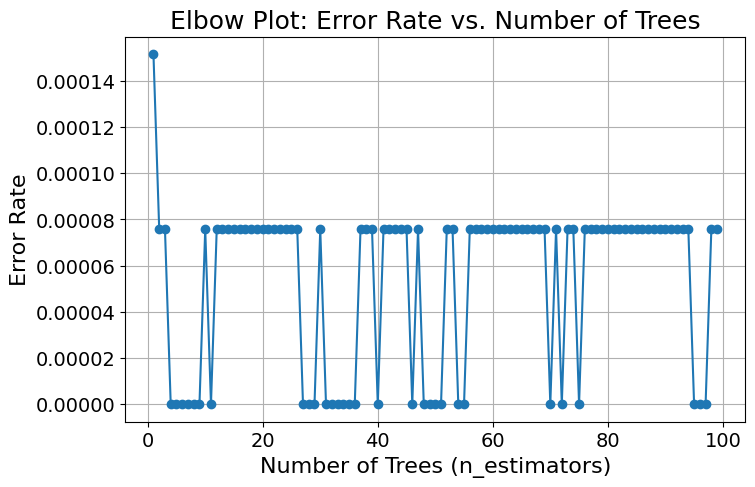

[0.9998484848484849, 0.9999242424242424, 0.9999242424242424, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999242424242424, 1.0, 0.9999242424242424, 0.9999242424242424, 0.9999242424242424, 0.9999242424242424, 0.9999242424242424, 0.9999242424242424, 0.9999242424242424, 0.9999242424242424, 0.9999242424242424, 0.9999242424242424, 0.9999242424242424, 0.9999242424242424, 0.9999242424242424, 0.9999242424242424, 0.9999242424242424, 1.0, 1.0, 1.0, 0.9999242424242424, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999242424242424, 0.9999242424242424, 0.9999242424242424, 1.0, 0.9999242424242424, 0.9999242424242424, 0.9999242424242424, 0.9999242424242424, 0.9999242424242424, 1.0, 0.9999242424242424, 1.0, 1.0, 1.0, 1.0, 0.9999242424242424, 0.9999242424242424, 1.0, 1.0, 0.9999242424242424, 0.9999242424242424, 0.9999242424242424, 0.9999242424242424, 0.9999242424242424, 0.9999242424242424, 0.9999242424242424, 0.9999242424242424, 0.9999242424242424, 0.9999242424242424, 0.9999242424242424, 0.9999242424242424, 0.9999242424242424,

In [36]:
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm

def elbow_plot(X_train, y_train, X_test, y_test):
    n_value = range(1, 100)
    error_rate = []
    accuracy_values = []

    for n in tqdm(n_value, desc="Training Models"):
        updated_model1 = RandomForestClassifier(
            n_estimators=n,
            max_depth=12,
            min_samples_split=10,
            min_samples_leaf=5,
            random_state=42
        )
        updated_model1.fit(X_train, y_train)
        predictions = updated_model1.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        accuracy_values.append(accuracy)

    error_rate = [1.0 - acc for acc in accuracy_values]

    plt.figure(figsize=(8, 5))
    plt.plot(n_value, error_rate, marker='o', linestyle='-')
    plt.xlabel('Number of Trees (n_estimators)')
    plt.ylabel('Error Rate')
    plt.title('Elbow Plot: Error Rate vs. Number of Trees')
    plt.grid(True)
    plt.show()

    return accuracy_values

accuracy_plot = elbow_plot(X_train, y_train, X_test, y_test)
print(accuracy_plot)


Training Models: 100%|█████████████████████████████████████████████████████████████████| 19/19 [00:02<00:00,  9.45it/s]


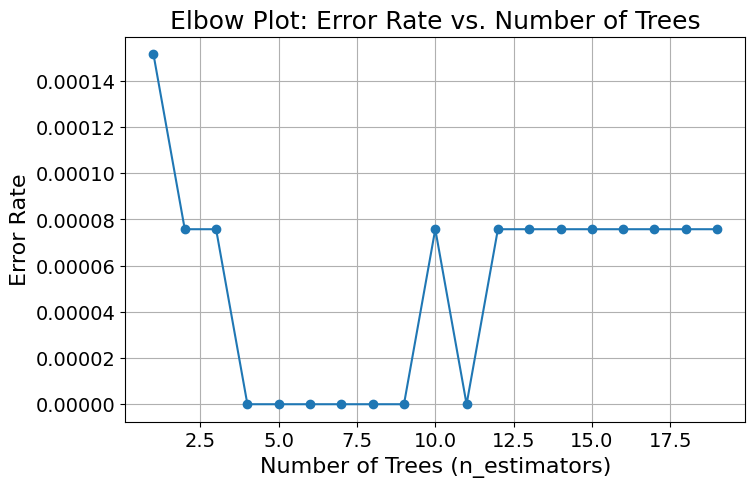

[0.9998484848484849, 0.9999242424242424, 0.9999242424242424, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999242424242424, 1.0, 0.9999242424242424, 0.9999242424242424, 0.9999242424242424, 0.9999242424242424, 0.9999242424242424, 0.9999242424242424, 0.9999242424242424, 0.9999242424242424]


In [37]:
def elbow_plot(X_train, y_train, X_test, y_test):
    n_value = range(1, 20)
    error_rate = []
    accuracy_values = []

    for n in tqdm(n_value, desc="Training Models"):
        updated_model1 = RandomForestClassifier(
            n_estimators=n,
            max_depth=12,
            min_samples_split=10,
            min_samples_leaf=5,
            random_state=42
        )
        updated_model1.fit(X_train, y_train)
        predictions = updated_model1.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        accuracy_values.append(accuracy)

    error_rate = [1.0 - acc for acc in accuracy_values]

    plt.figure(figsize=(8, 5))
    plt.plot(n_value, error_rate, marker='o', linestyle='-')
    plt.xlabel('Number of Trees (n_estimators)')
    plt.ylabel('Error Rate')
    plt.title('Elbow Plot: Error Rate vs. Number of Trees')
    plt.grid(True)
    plt.show()

    return accuracy_values

accuracy_plot = elbow_plot(X_train, y_train, X_test, y_test)
print(accuracy_plot)

Training Models: 100%|███████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  8.13it/s]


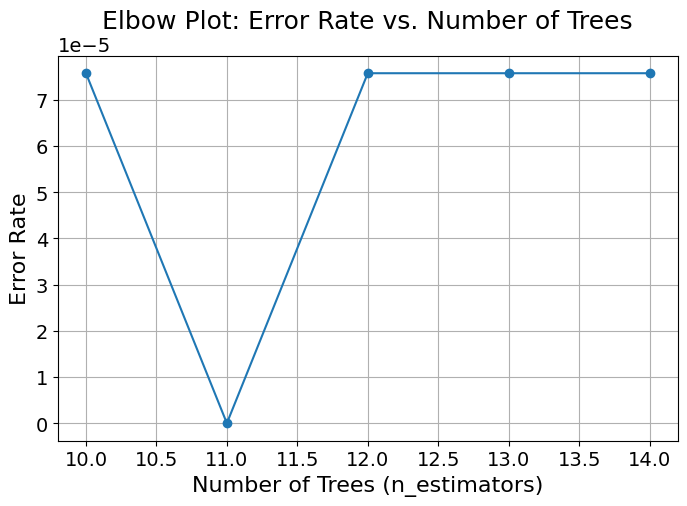

[0.9999242424242424, 1.0, 0.9999242424242424, 0.9999242424242424, 0.9999242424242424]


In [38]:
def elbow_plot(X_train, y_train, X_test, y_test):
    n_value = range(10, 15)
    error_rate = []
    accuracy_values = []

    for n in tqdm(n_value, desc="Training Models"):
        updated_model1 = RandomForestClassifier(
            n_estimators=n,
            max_depth=12,
            min_samples_split=10,
            min_samples_leaf=5,
            random_state=42
        )
        updated_model1.fit(X_train, y_train)
        predictions = updated_model1.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        accuracy_values.append(accuracy)

    error_rate = [1.0 - acc for acc in accuracy_values]

    plt.figure(figsize=(8, 5))
    plt.plot(n_value, error_rate, marker='o', linestyle='-')
    plt.xlabel('Number of Trees (n_estimators)')
    plt.ylabel('Error Rate')
    plt.title('Elbow Plot: Error Rate vs. Number of Trees')
    plt.grid(True)
    plt.show()

    return accuracy_values

accuracy_plot = elbow_plot(X_train, y_train, X_test, y_test)
print(accuracy_plot)

2. tune the max depth

Training Models: 100%|█████████████████████████████████████████████████████████████████| 12/12 [00:01<00:00,  7.37it/s]


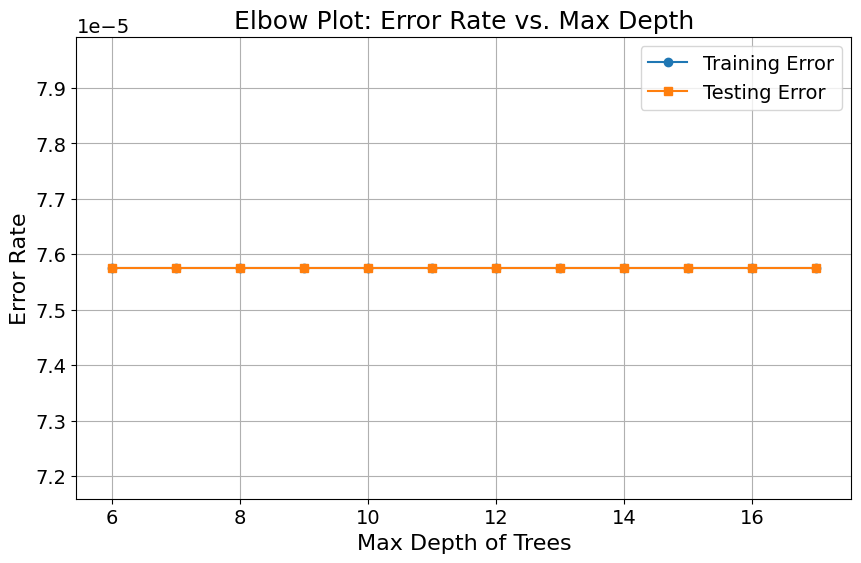

In [39]:
def elbow_plot(X_train, y_train, X_test, y_test):
    n_value = range(6, 18)
    error_rate_train = []
    error_rate_test = []
    accuracy_values_train = []
    accuracy_values_test = []

    for n in tqdm(n_value, desc="Training Models"):
        updated_model1 = RandomForestClassifier(
            n_estimators=12,
            max_depth=n,
            min_samples_split=10,
            min_samples_leaf=5,
            random_state=42
        )
        updated_model1.fit(X_train, y_train)
        prediction_train = updated_model1.predict(X_train)
        prediction_test = updated_model1.predict(X_test)
        accuracy_train = accuracy_score(y_train, prediction_train)
        accuracy_test = accuracy_score(y_test, prediction_test)
        accuracy_values_train.append(accuracy_train)
        accuracy_values_test.append(accuracy_test)

    error_rate_train = [1.0 - acc for acc in accuracy_values_train]
    error_rate_test = [1.0 - acc for acc in accuracy_values_test]

    plt.figure(figsize=(10, 6))
    plt.plot(n_value, error_rate_train, label='Training Error', marker='o')
    plt.plot(n_value, error_rate_test, label='Testing Error', marker='s')
    plt.xlabel('Max Depth of Trees')
    plt.ylabel('Error Rate')
    plt.title('Elbow Plot: Error Rate vs. Max Depth')
    plt.legend()
    plt.grid(True)
    plt.show()

accuracy_plot = elbow_plot(X_train, y_train, X_test, y_test)

3. use the learning curve to check for over/underfitting

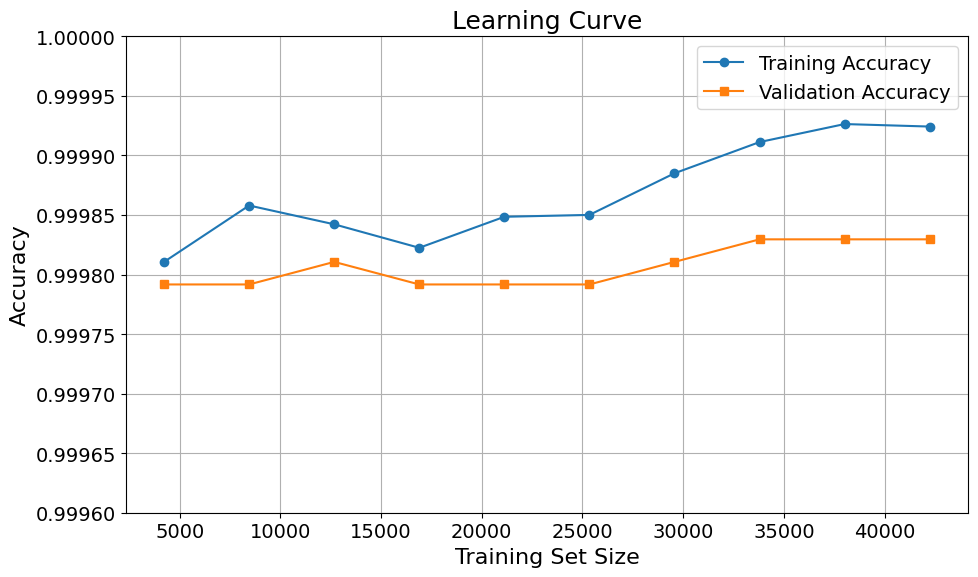

In [40]:
updated_model1 = RandomForestClassifier(n_estimators=12,
                                        max_depth=12,
                                        min_samples_split=10,
                                        min_samples_leaf=5,
                                        random_state=42
                                       )
updated_model1.fit(X_train, y_train)
prediction_train = updated_model1.predict(X_train)
prediction_test = updated_model1.predict(X_test)
accuracy_train = accuracy_score(y_train, prediction_train)
accuracy_test = accuracy_score(y_test, prediction_test)

train_sizes, train_scores, test_scores = learning_curve(
    estimator=updated_model1, X=X_train,
    y = y_train,
    cv = 5,
    train_sizes = np.linspace(0.1, 1.0, 10),
    scoring = 'accuracy',
    shuffle = True,
    random_state = 29
)
train_mean = train_scores.mean(axis = 1)
test_mean = test_scores.mean(axis = 1)
plt.figure()
plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o')
plt.plot(train_sizes, test_mean, label='Validation Accuracy', marker='s')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.ylim(0.9996, 1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

the model gets more accurate as more training data is introduced, but both the training and validation learning curves plateau. no overfitting and the rise of validation accuracy shows that it can generalize

In [209]:
RandomForestModel1_proccessed = RandomForestClassifier(
    n_estimators=12,
    max_depth=10, 
    min_samples_split=10, 
    min_samples_leaf=5, 
    random_state=42)

RandomForestModel1_proccessed.fit(X_train, y_train)

filename = 'RandomForestModel1_proccessed'
path = os.path.join(CHRIS_DATA_PATH, filename)

with open(path, 'wb') as f:
    pickle.dump(knn, f)